## Memprediksi Harga Jual Rumah

Tujuan dari proyek ini adalah membangun model Machine Learning untuk memprediksi harga jual rumah berdasarkan berbagai variabel penjelas yang menggambarkan aspek rumah hunian.


### Mengapa ini penting?

Memprediksi harga rumah berguna untuk mengidentifikasi investasi yang menguntungkan atau untuk menentukan apakah harga rumah yang diiklankan di atas atau di bawah perkiraan.


### Apa tujuan dari model Machine Learning?

Bertujuan untuk meminimalkan perbedaan antara harga sebenarnya dan harga yang diperkirakan oleh model. <br>
Model akan mengevaluasi performa model dengan:

1. mean squared error (mse)
2. akar pangkat dua dari kesalahan kuadrat rata-rata (rmse)
3. r-score (r2).

# Import Package

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#spliiting data train and test
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Function
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

# Import Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

# Data Investigation

Dataset harga rumah berisi 1460 baris dan 80 kolom

79 adalah variabel prediktif dan 1 adalah variabel target: SalePrice

## Analisis

**Akan dianalisis hal-hal berikut:**

1. Variabel sasaran
2. Jenis variabel (kategorikal dan numerik)
3. Data yang hilang
4. Variabel numerik
     - Diskrit
     - Terus menerus
     - Distribusi
     - Transformasi

5. Variabel kategori
     - Kardinalitas
     - Label Langka
     - Pemetaan khusus

## Sasaran

Mari kita mulai dengan menjelajahi distribusi target.

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

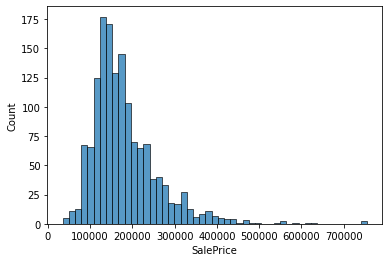

In [5]:
sns.histplot(data=df,x="SalePrice")

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

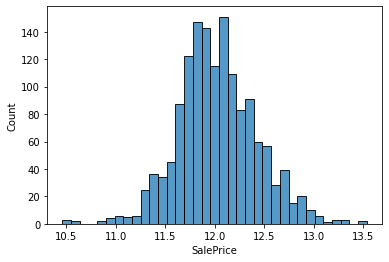

In [6]:
#feature engineering : transformation
sns.histplot(np.log(df["SalePrice"]))

# Feature Selection : Missing Values

In [12]:
pd.set_option("display.max_rows",None)
missing(df)

,missing,percent_missing,types,n_unique
FireplaceQu,690,47.26,object,5
LotFrontage,259,17.74,float64,110
GarageType,81,5.55,object,6
GarageYrBlt,81,5.55,float64,97
GarageFinish,81,5.55,object,3
GarageQual,81,5.55,object,5
GarageCond,81,5.55,object,5
BsmtExposure,38,2.60,object,4
BsmtFinType2,38,2.60,object,6
BsmtQual,37,2.53,object,4


In [8]:
#rule of thumb
#buat variable yang mengandung missing value lebih 50%

var_drop = [var for var in df.columns if df[var].isnull().sum()/len(df) > 0.5]

var_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

**.drop()** ini adalah fungsi yang digunakan untuk mendrop kolom pada dataset, Note : drop kolom gunakan axis=1

In [9]:
#drop variable
df = df.drop(var_drop,axis=1)

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [11]:
df = df.drop("Id",axis=1)

# Missing Analize

In [16]:
#pisahkan variable categorical dan numerical

cat_vars = [var for var in df.columns if df[var].dtype == 'O']

# MSsubClass adalah categorical variable, masukkan ke cat_vars
cat_vars = cat_vars + ['MSSubClass']


num_vars = [
    var for var in df.columns if var not in cat_vars and var != 'SalePrice'
]

In [17]:
# membuat list baru yang menampung variable nan untuk dianalisis
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]


df[vars_with_na].isnull().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [18]:
#pisahkan data catgorical dan numerikal untuk mempermudah analisa missing
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  12
Number of numerical variables with na:  3


In [24]:
cat_na

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [23]:
def analyse_na_value(df, var):
    #membuat backup
    df = df.copy()

    #observasi missing values dengan melakukan encoding, 1 adalah missing dan 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    #create grup by untuk analisa rata rata sales price
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

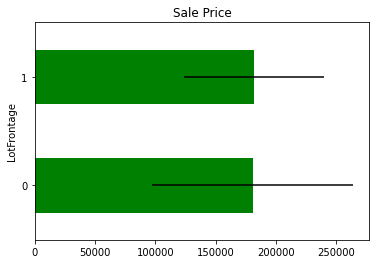

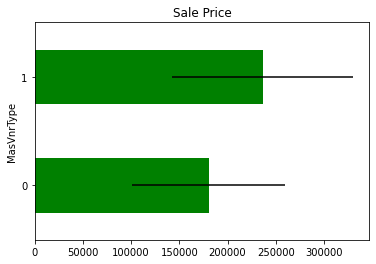

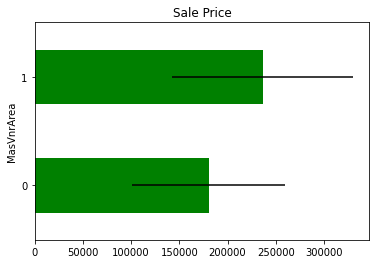

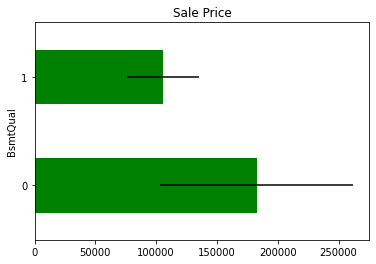

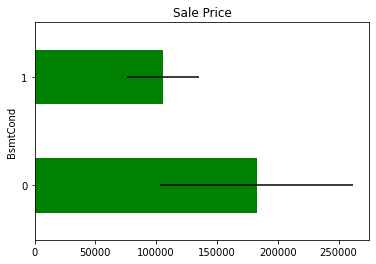

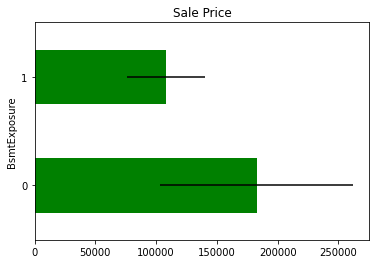

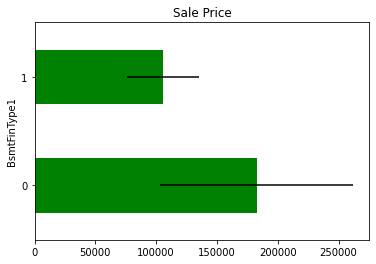

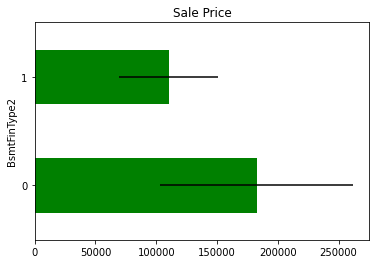

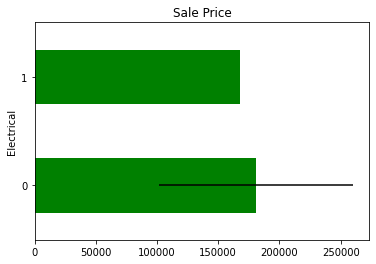

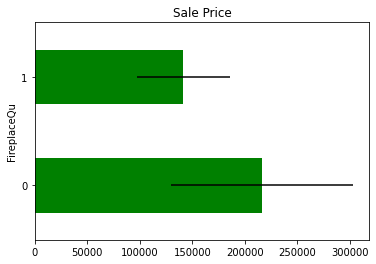

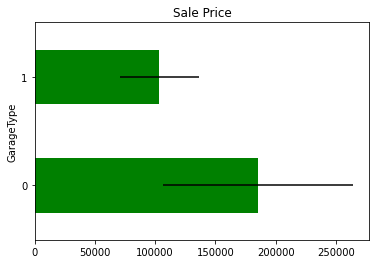

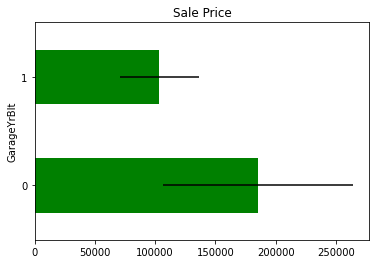

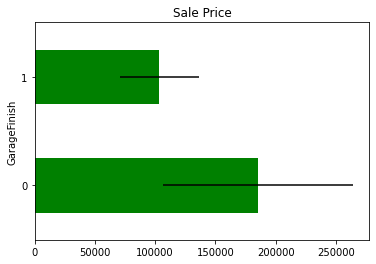

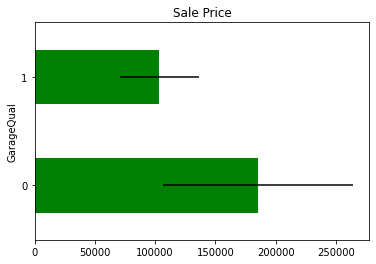

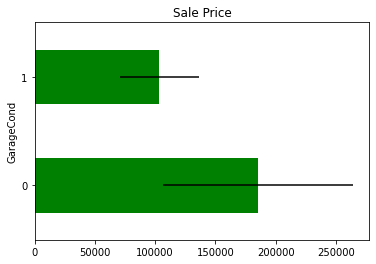

In [26]:
#looping
for var in vars_with_na:
    analyse_na_value(df, var)

Diamati bahwa beberapa variable yang mangandung missing memberikan sebuah informasi, hal ini terlihat dari perbedaan rata ratanya. Variable selain LotFrontAge adalah predictor yang bagus.

# Feature Engineering : Creation

## Temporal Variables

Disini kita memiliki 4 variable waktu yaitu : <br>

- YearBuilt: tahun rumah dibangun
- YearRemodAdd: Tahun rumah di perbaiki
- GarageYrBlt:tahun garasi dibangun
- YrSold: tahun rumah di jual

kita dapat mengekstrak informasi pada 4 variable ini untuk di analisis, seperti Umur rumah = YrSold - YearBuilt.

In [28]:
# membuat list variable waktu

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Price')

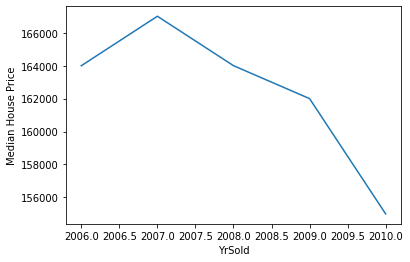

In [30]:
#plot median saleprice
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

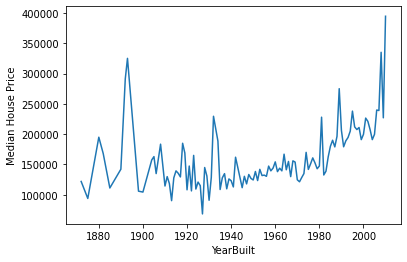

In [31]:
df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

In [32]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    #feature enginerring
    #menghitung umur
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

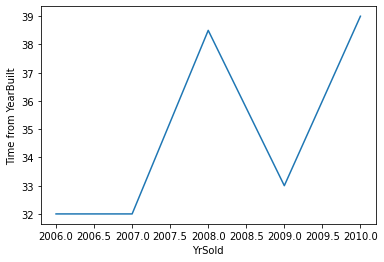

In [33]:
analyse_year_vars(df,"YearBuilt")

In [34]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

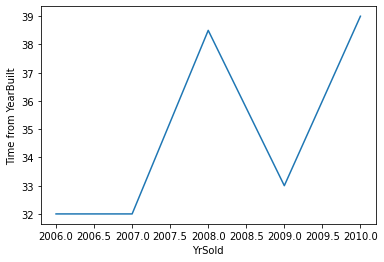

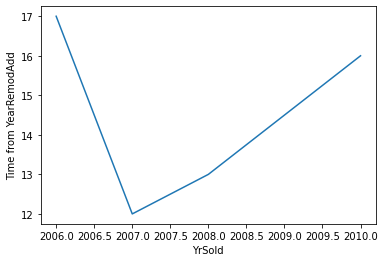

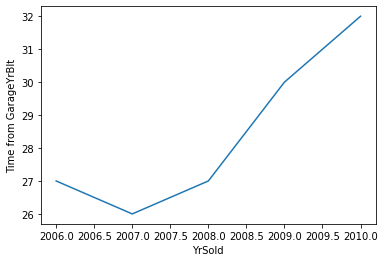

In [35]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(df, var)

Dari plot, terlihat bahwa menjelang tahun 2010, rumah yang dijual memiliki garasi yang lebih tua, dan belum direnovasi, yang mungkin menjelaskan mengapa  terlihat harga penjualan yang lebih murah dalam beberapa tahun terakhir, setidaknya dalam kumpulan data ini.

Sekarang dapat memplot waktu sejak terakhir direnovasi, atau waktu sejak dibangun, dan harga jual, untuk melihat apakah ada hubungan.

In [37]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    sns.regplot(data=df,x=var, y='SalePrice',
               line_kws={"color":"red"},
               scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

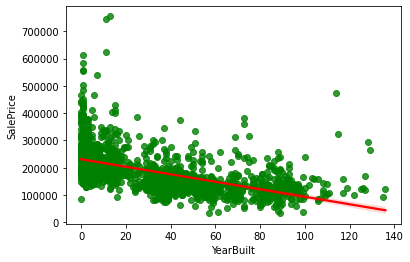

In [38]:
analyse_year_vars(df,"YearBuilt")

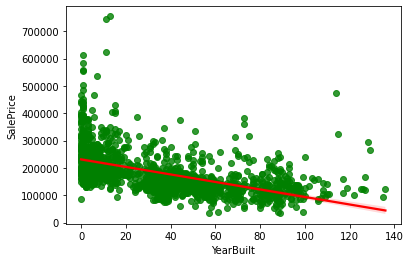

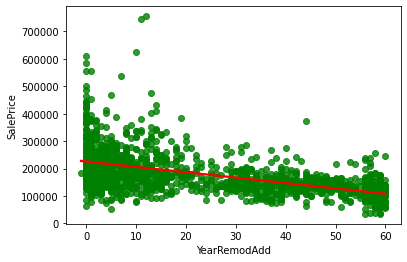

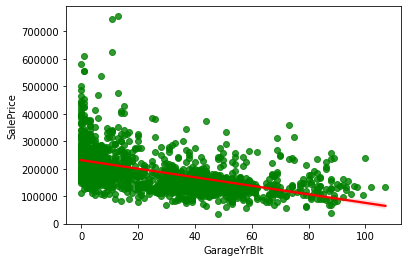

In [40]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(df, var)

Terlihat ada kecenderungan penurunan harga, dengan rumah yang lebih tua. Dengan kata lain, semakin lama waktu antara rumah dibangun atau direnovasi dan tanggal penjualan, semakin rendah harga jualnya.

Yang masuk akal, karena ini berarti rumah tersebut akan terlihat lebih tua, dan berpotensi membutuhkan perbaikan.

# Discreate Variable

In [42]:
# discreate kalo jumlah unique kurang 20

discrete_vars = [var for var in num_vars if len(
    df[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [43]:
discrete_vars

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

Variabel diskrit ini cenderung berupa kualifikasi (Qual) atau skala penilaian (Cond), atau mengacu pada jumlah kamar, atau unit (FullBath, GarageCars), atau menunjukkan luas ruangan (KitchenAbvGr).

tentu diharapkan harga yang lebih tinggi, dengan jumlah yang lebih besar.

MoSold adalah bulan di mana rumah dijual.

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

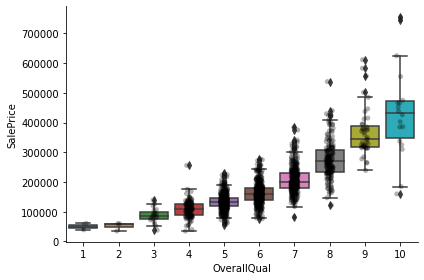

In [46]:
sns.catplot(x="OverallQual", y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
sns.stripplot(x="OverallQual", y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')

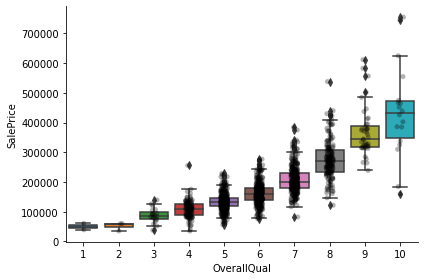

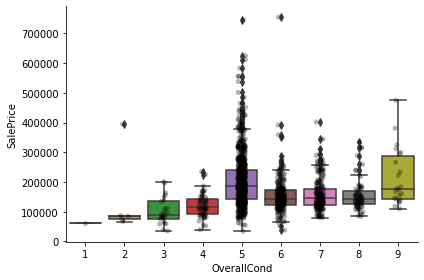

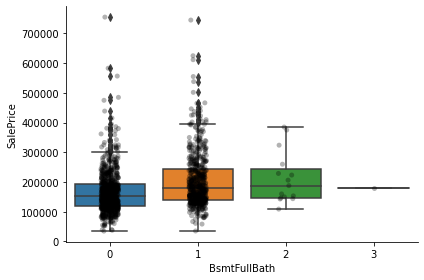

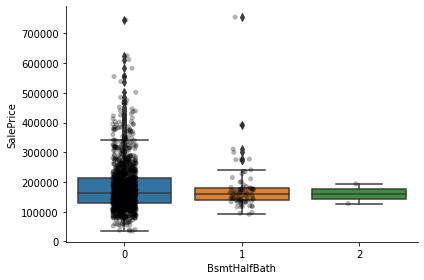

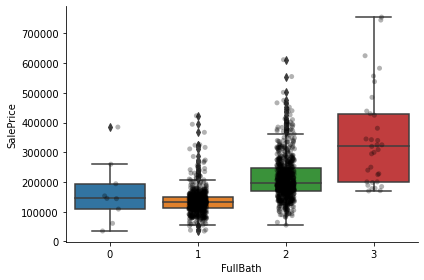

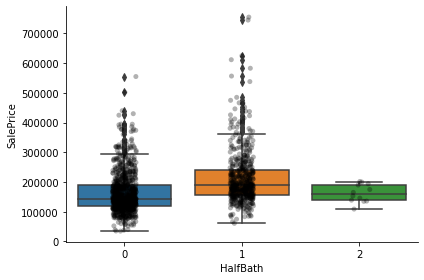

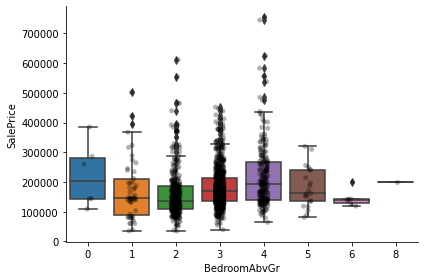

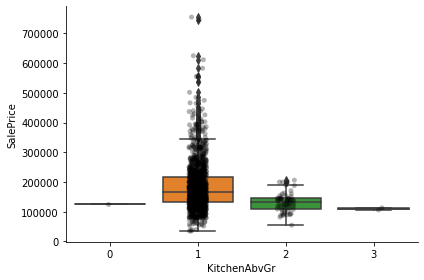

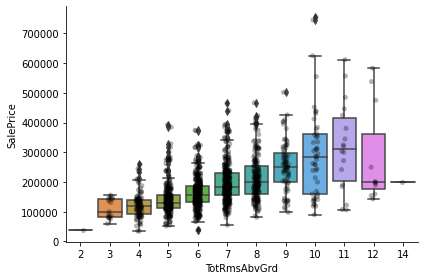

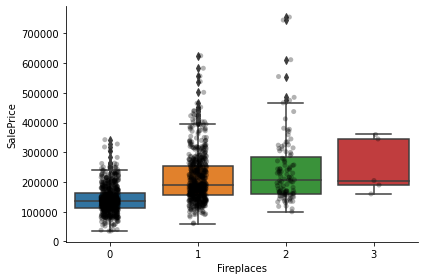

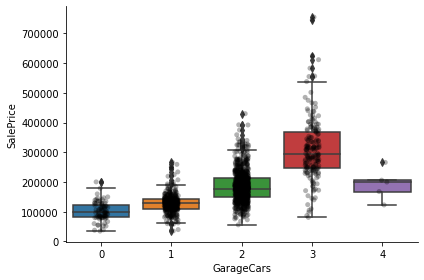

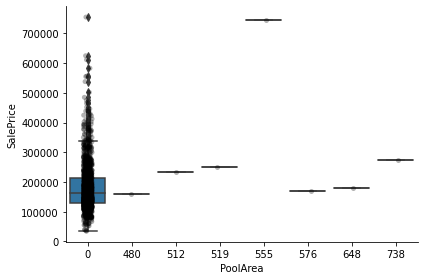

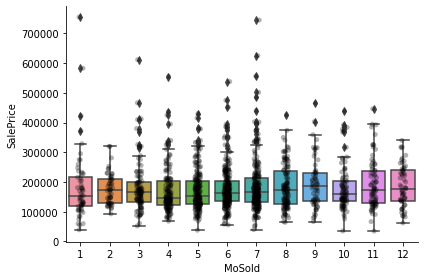

In [47]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

tuk sebagian besar variabel numerik diskrit, terlihat adanya peningkatan harga jual, dengan kualitas, atau kondisi keseluruhan, atau jumlah ruangan, atau permukaan.

Untuk beberapa variabel, tidak terlihat kecenderungan ini. Kemungkinan besar variabel tersebut bukanlah prediktor harga jual yang baik.

# Continuous

In [48]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


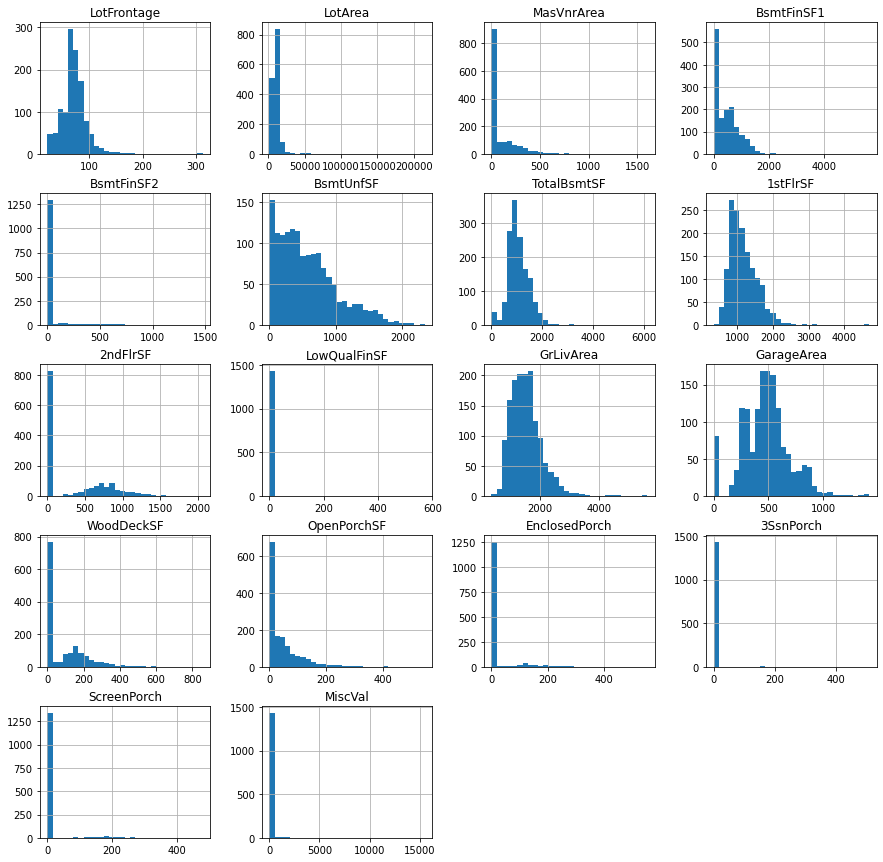

In [50]:
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

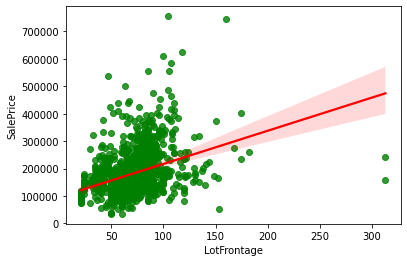

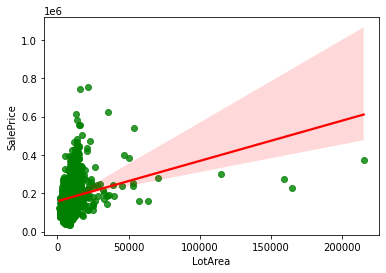

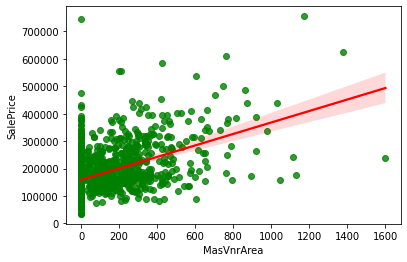

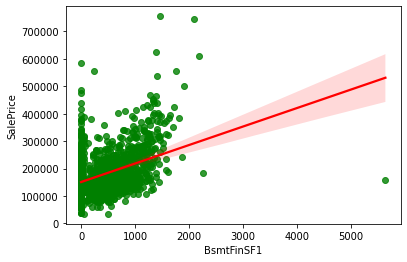

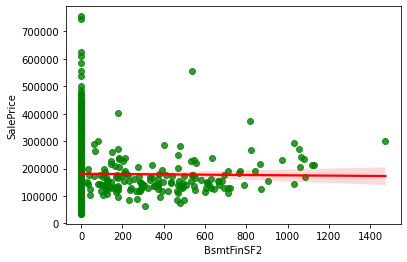

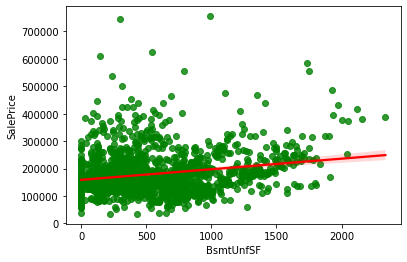

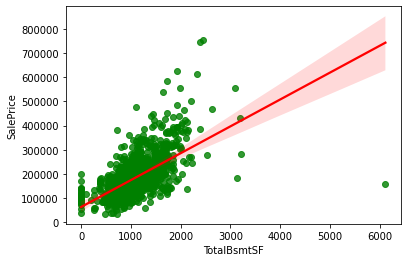

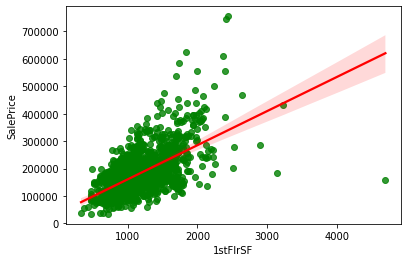

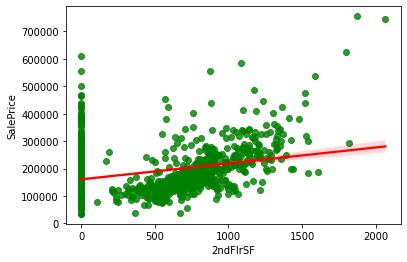

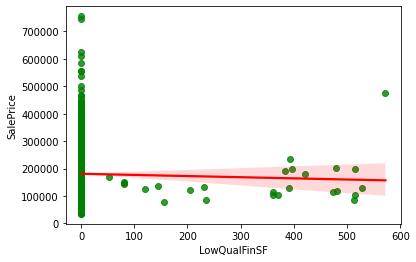

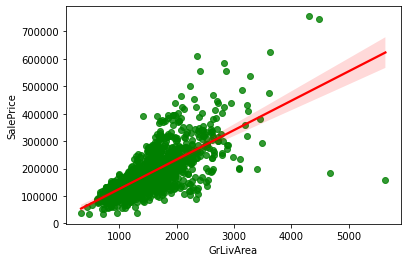

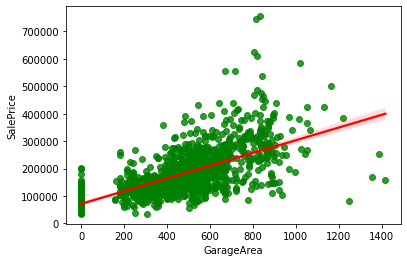

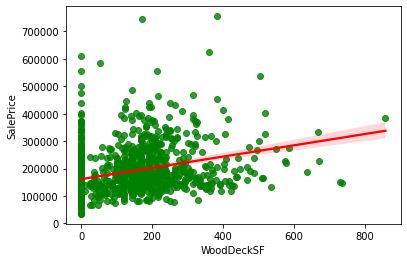

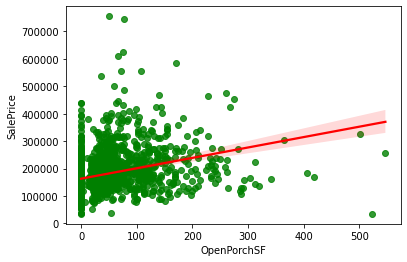

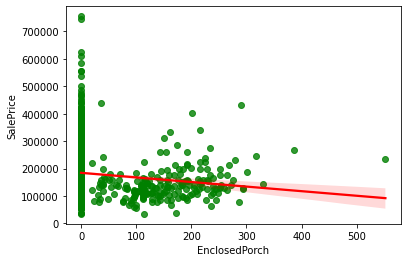

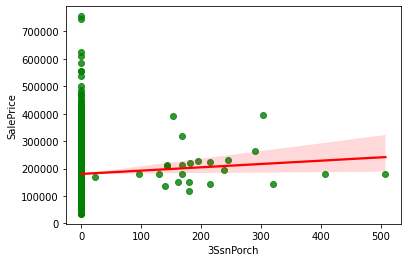

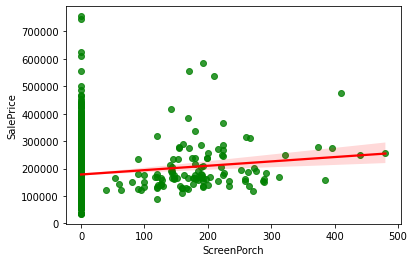

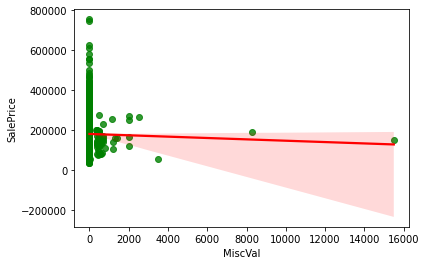

In [51]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=df,x=x,y="SalePrice",
               line_kws={"color":"red"},
               scatter_kws={"color":"g"});

In [52]:
#membuat list variable skew

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]


#membuat list variable continuous
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

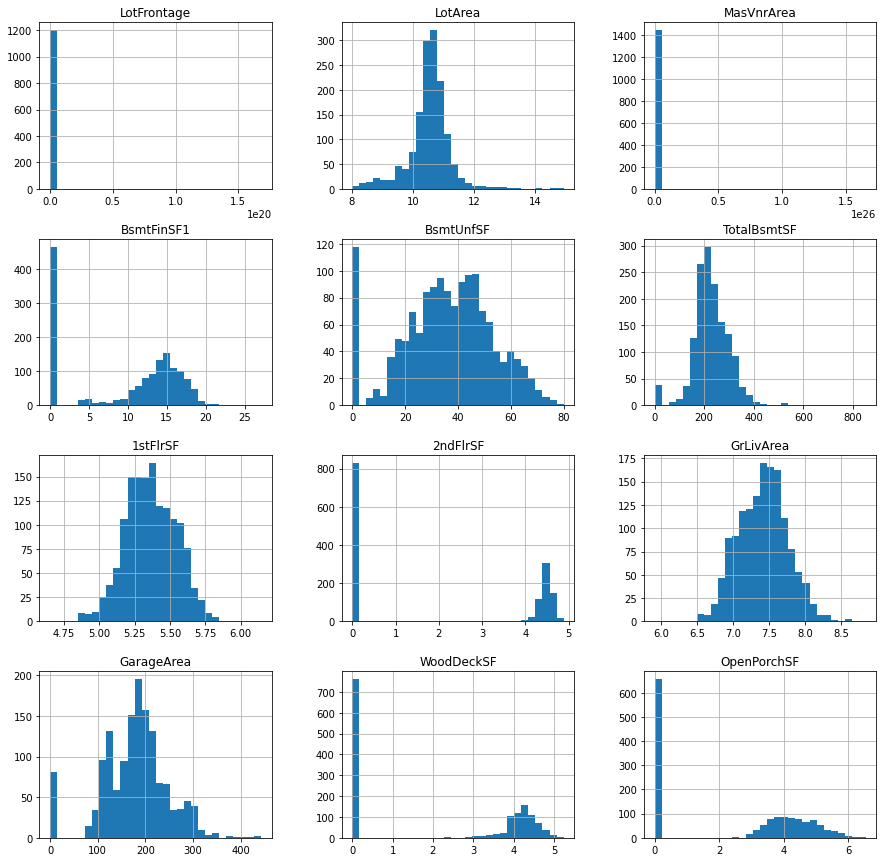

In [53]:
# Feature Transformation : Yeo-Johnson
# temporary copy of the data
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

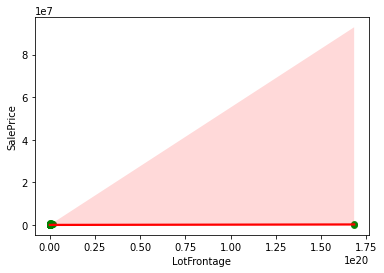

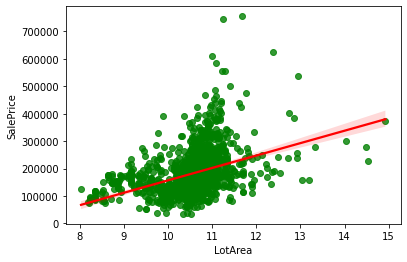

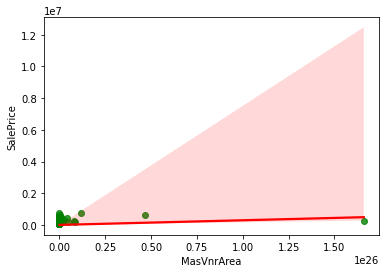

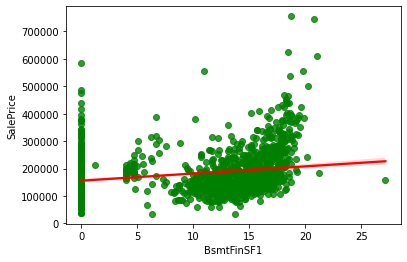

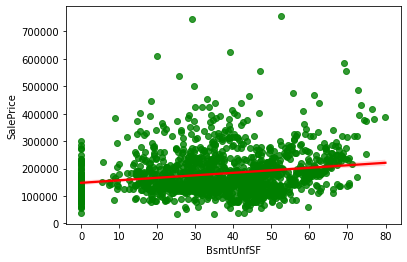

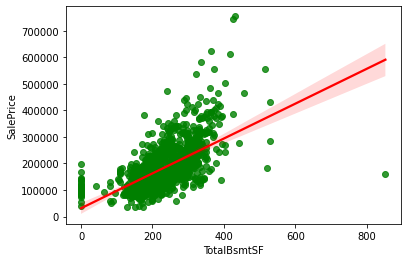

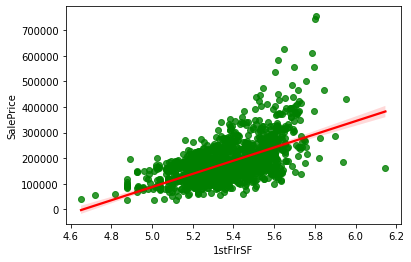

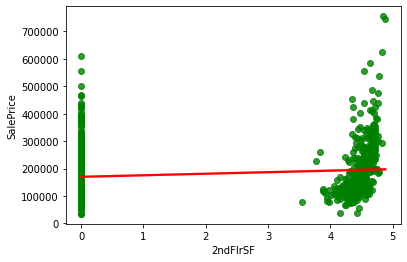

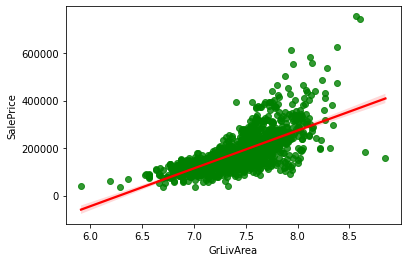

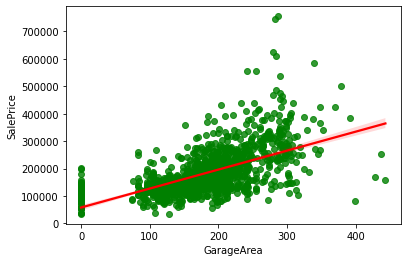

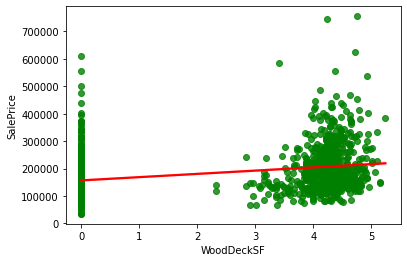

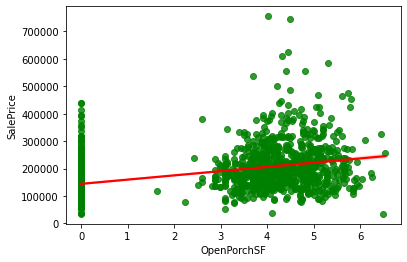

In [55]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=tmp,x=x,y="SalePrice",
               line_kws={"color":"red"},
               scatter_kws={"color":"g"});

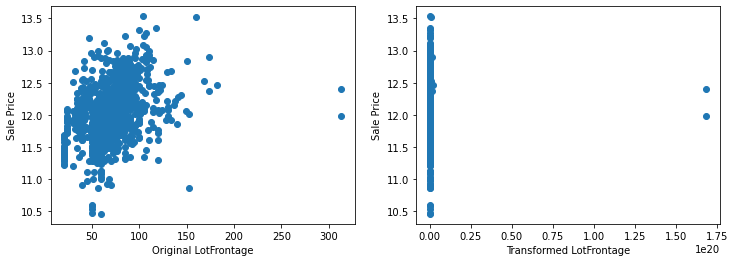

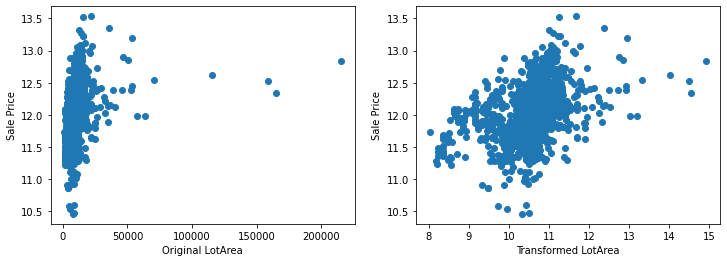

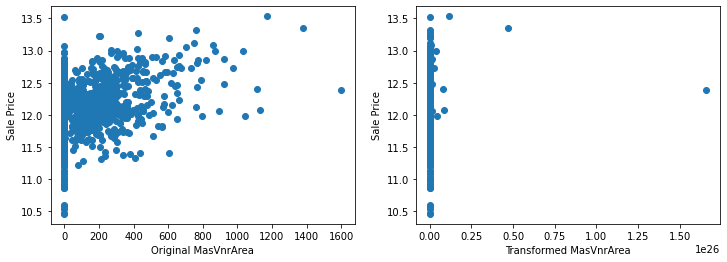

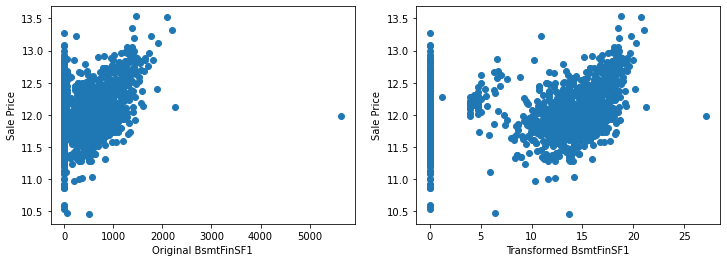

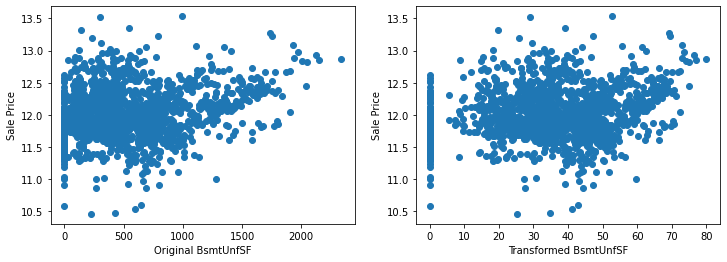

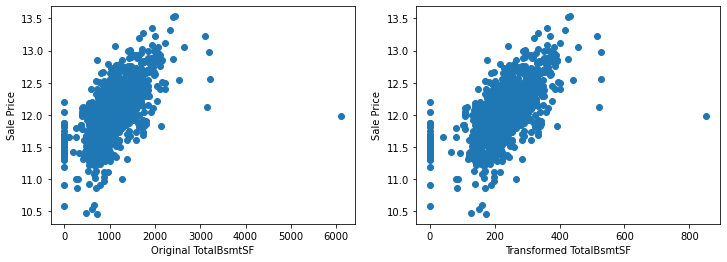

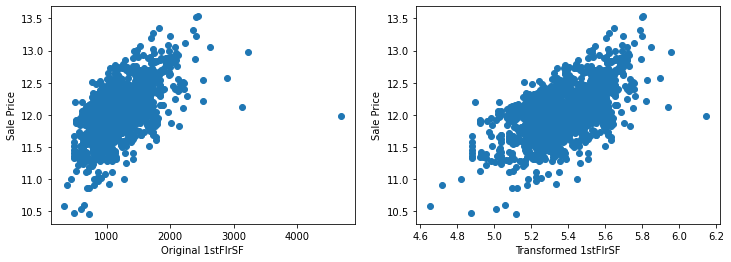

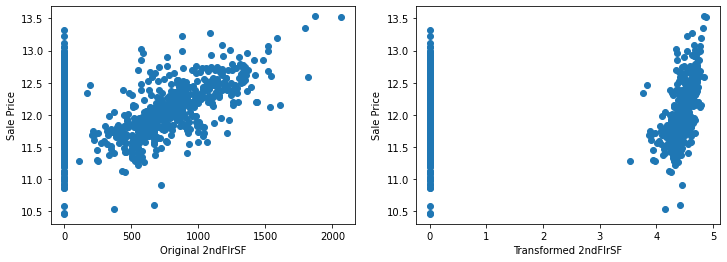

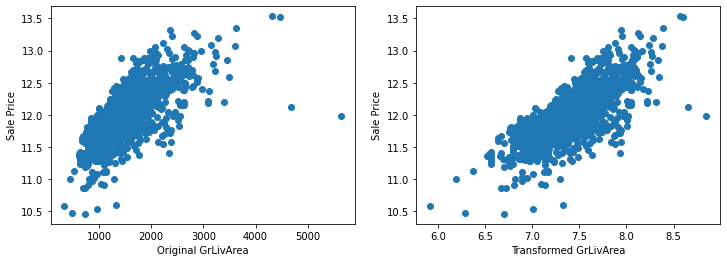

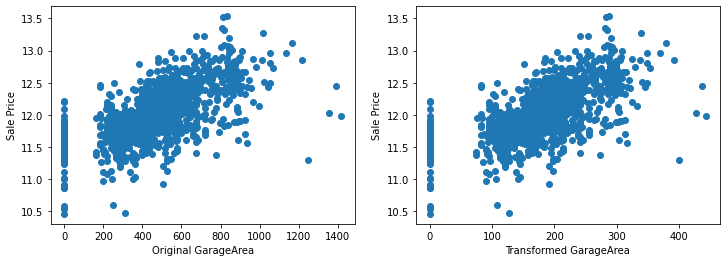

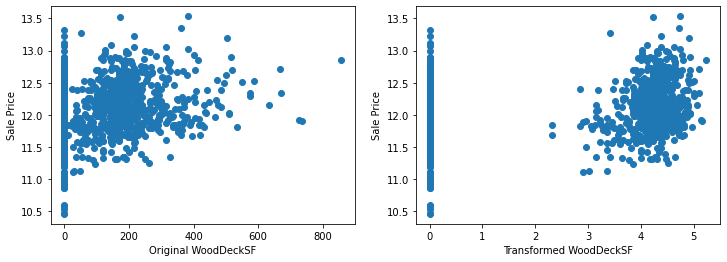

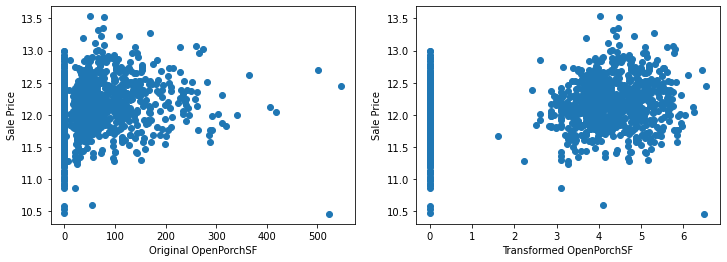

In [56]:
#transform log
for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

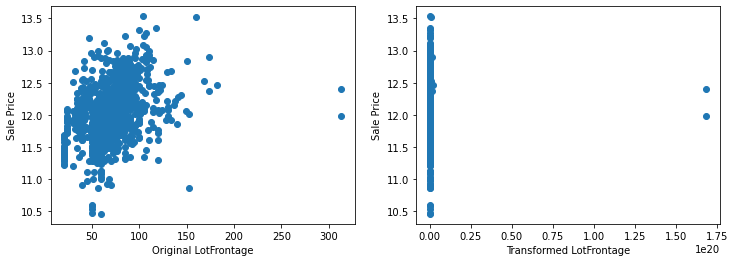

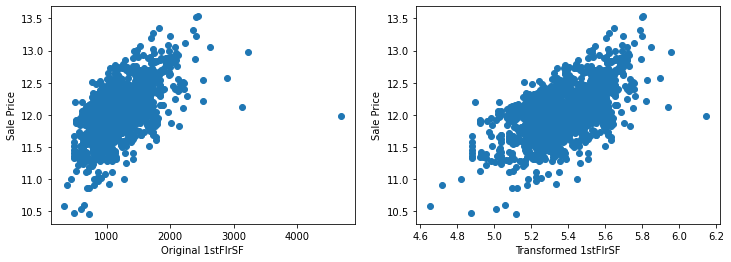

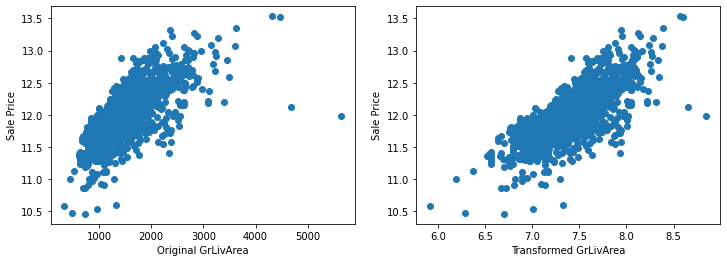

In [57]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

Variabel yang diubah memiliki sebaran nilai yang lebih baik, yang pada gilirannya dapat membantu membuat prediksi yang lebih baik.

# Skew Variables

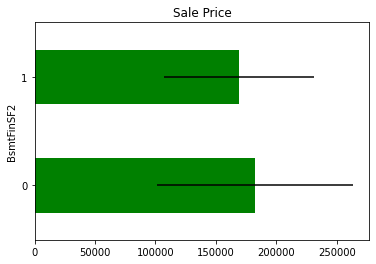

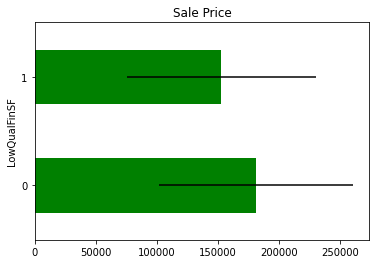

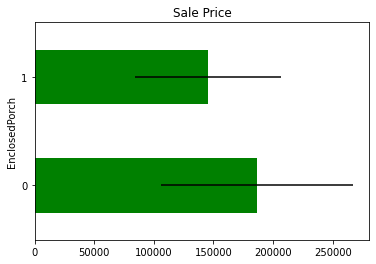

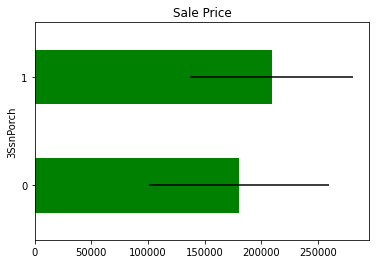

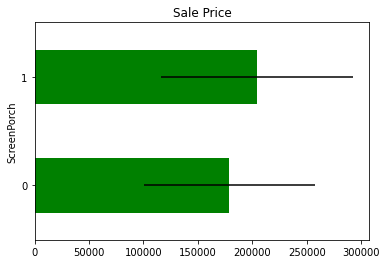

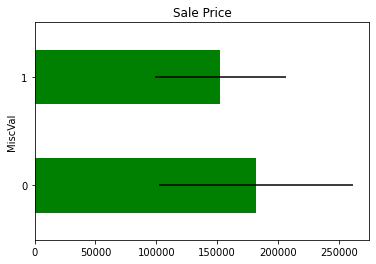

In [59]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

# Categorical Variable

## Number of labels: cardinality

In [65]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [63]:
cat_vars = df.select_dtypes(exclude=["float","int"]).columns.tolist()

cat_vars = cat_vars + ['MSSubClass']
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  40


<AxesSubplot: >

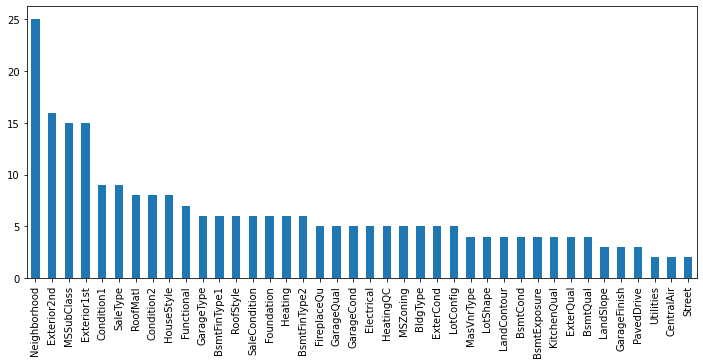

In [64]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [84]:
(df["Neighborhood"].value_counts()/len(df))*100

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

# Handle Rare Variables

In [92]:
temp = df.copy()

temp = temp.groupby("Neighborhood")["Neighborhood"].count().sort_values(ascending=False)/len(df)

rare = temp[temp < 0.01].index

test = df.copy()

test["Neighborhood"] = np.where(test["Neighborhood"].isin(rare),"Rare",test["Neighborhood"])


test["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Rare        22
MeadowV     17
Blmngtn     17
BrDale      16
Name: Neighborhood, dtype: int64

In [93]:
for x in cat_vars:
    temp = df.copy()

    temp = temp.groupby(x)[x].count().sort_values(ascending=False)/len(df)

    rare = temp[temp < 0.01].index

    df[x] = np.where(df[x].isin(rare),"Rare",df[x])

Semua variabel kategori menunjukkan kardinalitas yang rendah, ini berarti hanya memiliki beberapa label yang berbeda. Itu bagus karena kita tidak perlu menangani kardinalitas.


# Feature Encode : Ordinal Encode

## Variabel Quality

Ada sejumlah variabel yang merujuk pada kualitas beberapa aspek rumah, misalnya garasi, atau pagar, atau dapur. Disini akan dilakukan mapping kategori dengan angka yang meningkat sesuai kualitas tempat atau ruangan.

Salah satu contoh:

- Ex = Luar biasa
- Gd = Baik
- TA = Rata-Rata/Khas
- Fa = Adil
- Po = Buruk

In [96]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [97]:
quality = [var for var in df.columns if "qual" in var.lower() or "qu" in var.lower() or "qc" in var.lower() or "cond" in var.lower()]

In [98]:
for x in quality:
    print(f"====={x}===")
    print(f"{df[x].unique()}")

=====Condition1===
['Norm' 'Feedr' 'PosN' 'Artery' 'Rare' 'RRAn']
=====Condition2===
['Norm' 'Rare']
=====OverallQual===
[ 7  6  8  5  9  4 10  3  1  2]
=====OverallCond===
[5 8 6 7 4 2 3 9 1]
=====ExterQual===
['Gd' 'TA' 'Ex' 'Rare']
=====ExterCond===
['TA' 'Gd' 'Fa' 'Rare']
=====BsmtQual===
['Gd' 'TA' 'Ex' nan 'Fa']
=====BsmtCond===
['TA' 'Gd' nan 'Fa' 'Rare']
=====HeatingQC===
['Ex' 'Gd' 'TA' 'Fa' 'Rare']
=====LowQualFinSF===
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
=====KitchenQual===
['Gd' 'TA' 'Ex' 'Fa']
=====FireplaceQu===
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
=====GarageQual===
['TA' 'Fa' 'Rare' nan]
=====GarageCond===
['TA' 'Fa' nan 'Rare']
=====SaleCondition===
['Normal' 'Abnorml' 'Partial' 'Rare' 'Family']


In [104]:
df["BsmtQual"] = df["BsmtQual"].map({"Ex":5,
                                      "Gd":4,
                                      "TA":3,
                                      "Fa":2,
                                      "nan":1})

df["BsmtCond"] = df["BsmtCond"].map({"Gd":4,
                                      "TA":3,
                                      "Fa":2,
                                      "Rare":1,
                                    "nan":0})

df["HeatingQC"] = df["HeatingQC"].map({"Ex":5,
                                      "Gd":4,
                                      "TA":3,
                                      "Fa":2,
                                      "Rare":1})

df["KitchenQual"] = df["KitchenQual"].map({"Ex":4,
                                          "Gd":3,
                                          "TA":2,
                                          "Fa":1})

df["FireplaceQu"] = df["FireplaceQu"].map({"Ex":6,
                                          "Gd":5,
                                          "TA":4,
                                          "Fa":3,
                                          "Po":2,
                                          np.nan:1})

df["GarageQual"] = df["GarageQual"].map({"TA":4,
                                        "Fa":3,
                                        "Rare":2,
                                        np.nan:1})

In [105]:
df["GarageCond"] = df["GarageCond"].map({"TA":3,
                                        "Fa":2,
                                        "Rare":1,
                                        np.nan:0})

<AxesSubplot: xlabel='GarageCond'>

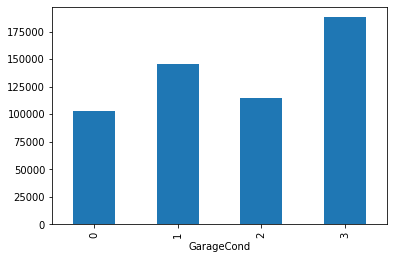

In [107]:
df.groupby("GarageCond")["SalePrice"].mean().plot(kind="bar")

<AxesSubplot: xlabel='ExterCond'>

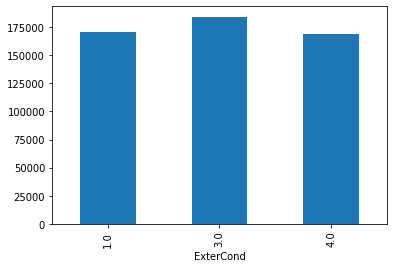

In [102]:
df["ExterCond"] = df["ExterCond"].map({"Gd":4,
                                      "TA":3,
                                      "FA":2,
                                      "Rare":1})

df.groupby("ExterCond")["SalePrice"].mean().plot(kind="bar")

<AxesSubplot: xlabel='ExterCond'>

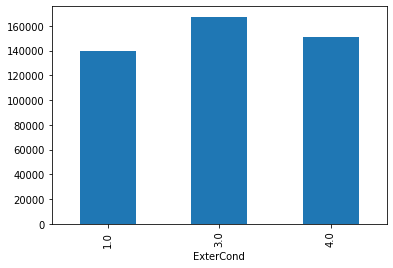

In [103]:
df.groupby("ExterCond")["SalePrice"].median().plot(kind="bar")

In [99]:
# Feature Encode Ordinal
df["ExterQual"] = df["ExterQual"].map({"Ex":4,
                                      "Gd":3,
                                      "TA":2,
                                      "Rare":1})

df["ExterQual"].unique()

array([3, 2, 4, 1], dtype=int64)

<AxesSubplot: xlabel='ExterQual'>

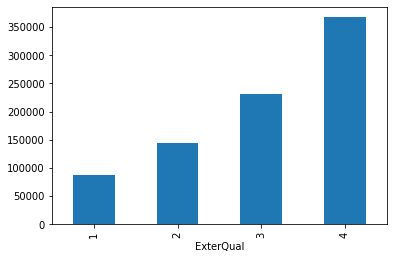

In [101]:
df.groupby("ExterQual")["SalePrice"].mean().plot(kind="bar")

In [109]:
cat_vars = df.select_dtypes(exclude=["float","int"]).columns
cat_vars

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [112]:
df.groupby("MSSubClass")["SalePrice"].mean().sort_values(ascending=True)

MSSubClass
30       95829.724638
Rare    113484.615385
190     129613.333333
90      133541.076923
160     138647.380952
50      143302.972222
85      147810.000000
70      166772.416667
80      169736.551724
20      185224.811567
75      192437.500000
120     200779.080460
60      239948.501672
Name: SalePrice, dtype: float64

In [114]:
{k:i for i,k in enumerate(df.groupby("MSSubClass")["SalePrice"].mean().sort_values(ascending=True).index,0)}

{'30': 0,
 'Rare': 1,
 '190': 2,
 '90': 3,
 '160': 4,
 '50': 5,
 '85': 6,
 '70': 7,
 '80': 8,
 '20': 9,
 '75': 10,
 '120': 11,
 '60': 12}

In [115]:
def encode_ordinal(df,var,target):
    temp = df.copy()
    temp = temp.groupby(var)[target].mean().sort_values(ascending=True).index
    
    ordinal_labels = {k:i for i,k in enumerate(temp,0)}
    
    return df[var].map(ordinal_labels)

In [118]:
for x in cat_vars:
    df[x] = encode_ordinal(df,x,"SalePrice")

In [119]:
df[cat_vars].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,12,3,1,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2.0,4,0.0,5.0,4.0,2,1,3.0,4,3.0,1.0,2,2,3
1,9,3,1,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1.0,2,3.0,3.0,4.0,2,1,3.0,4,3.0,1.0,2,2,3
2,12,3,1,1,1,1,0,0,15,4,1,4,5,0,0,9,9,2.0,4,1.0,5.0,4.0,2,1,3.0,4,3.0,1.0,2,2,3
3,7,3,1,1,1,1,2,0,16,4,1,4,5,0,0,2,4,1.0,1,0.0,3.0,4.0,2,1,3.0,4,1.0,0.0,2,2,0
4,12,3,1,1,1,1,1,0,22,4,1,4,5,0,0,9,9,2.0,4,2.0,5.0,4.0,2,1,3.0,4,3.0,1.0,2,2,3


Preprocessing

In [120]:
missing(df)

,missing,percent_missing,types,n_unique
LotFrontage,259,17.74,float64,110
GarageType,81,5.55,float64,5
GarageYrBlt,81,5.55,float64,97
GarageFinish,81,5.55,float64,3
BsmtExposure,38,2.60,float64,4
BsmtFinType2,38,2.60,float64,6
BsmtQual,37,2.53,float64,4
BsmtFinType1,37,2.53,float64,6
BsmtCond,37,2.53,float64,4
ExterCond,28,1.92,float64,3


In [134]:
# Imputasi missing pada kolom yang mengandung percent missing dibawah 1%
var_mis = [var for var in df.columns if (df[var].isnull().sum()/len(df) <= 0.01) and (df[var].isnull().sum()/len(df) > 0)]

var_mis

[]

In [125]:
#imputasi modus pada discreate dan median pada continuous
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())

In [131]:
df["MasVnrType"].mode()[0]

1.0

In [133]:
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [139]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

In [140]:
df["GarageFinish"] = df["GarageFinish"].fillna(0)

In [142]:
df["GarageType"] = df["GarageType"].fillna(0)

In [143]:
var_na = [var for var in df.columns if df[var].isnull().sum() > 0]

var_na

['LotFrontage',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2']

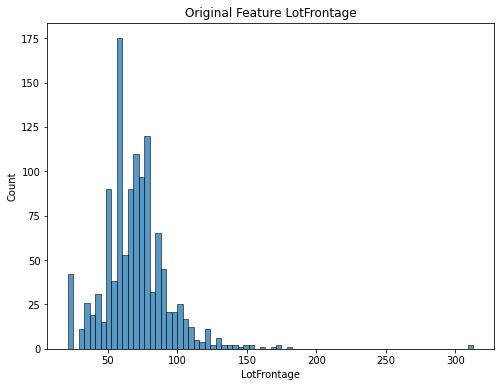

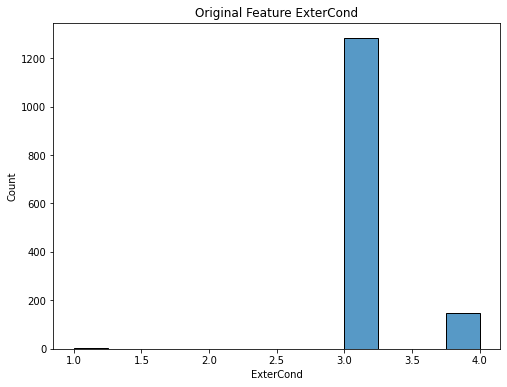

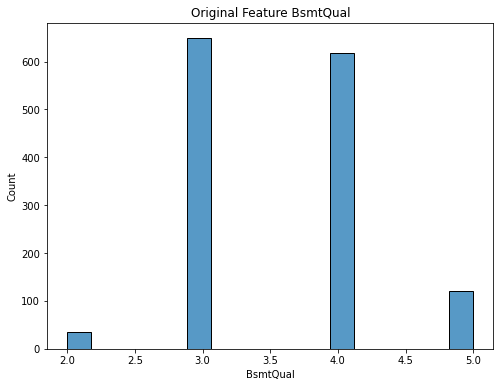

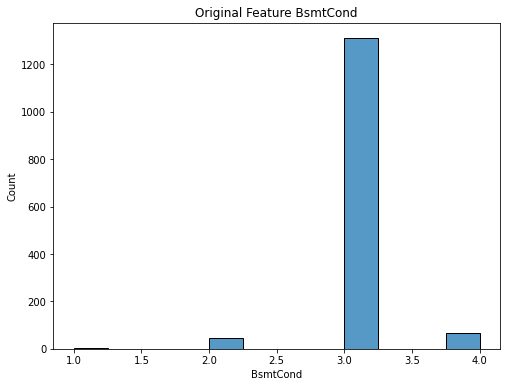

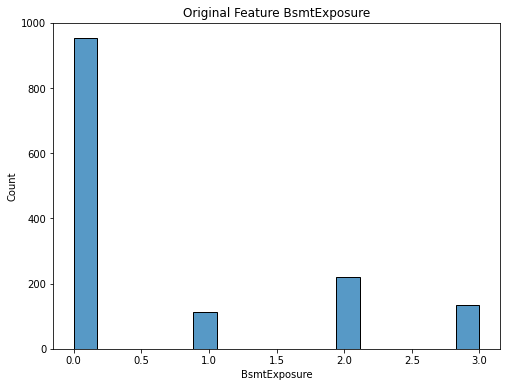

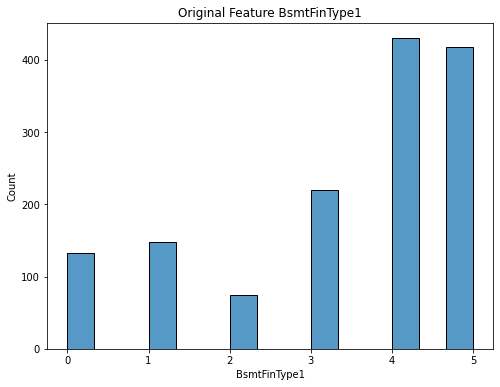

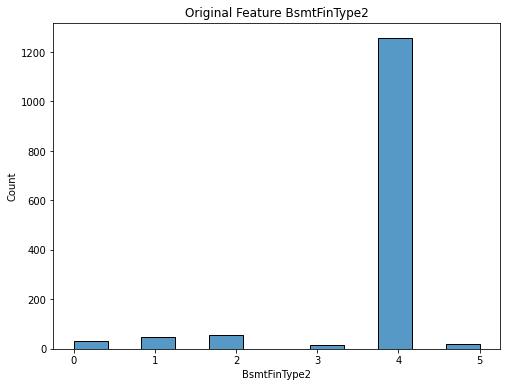

In [145]:
for x in var_na:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=x)
    plt.title(f"Original Feature {x}")

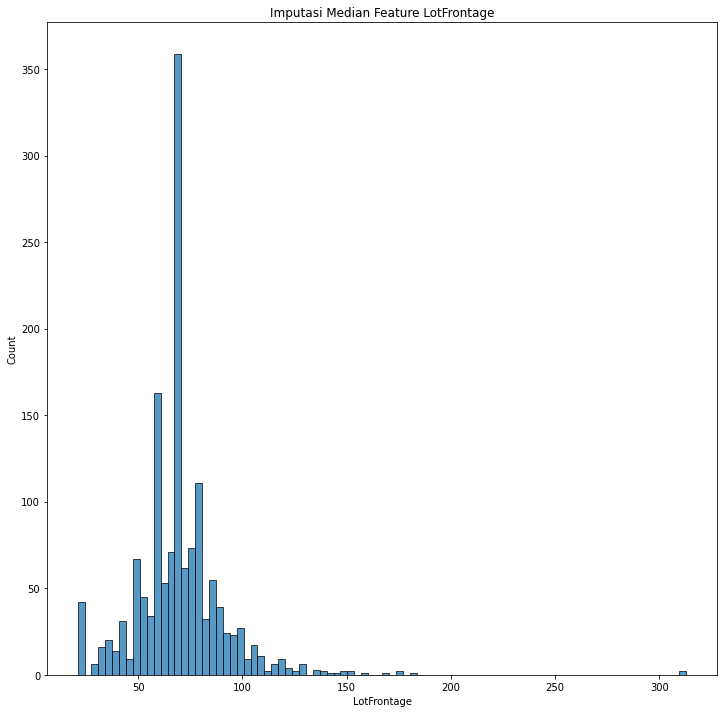

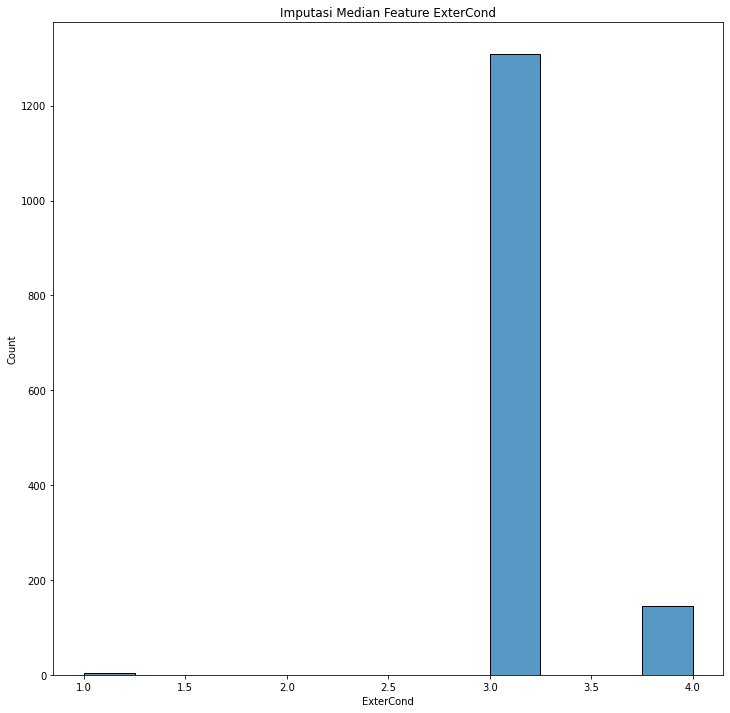

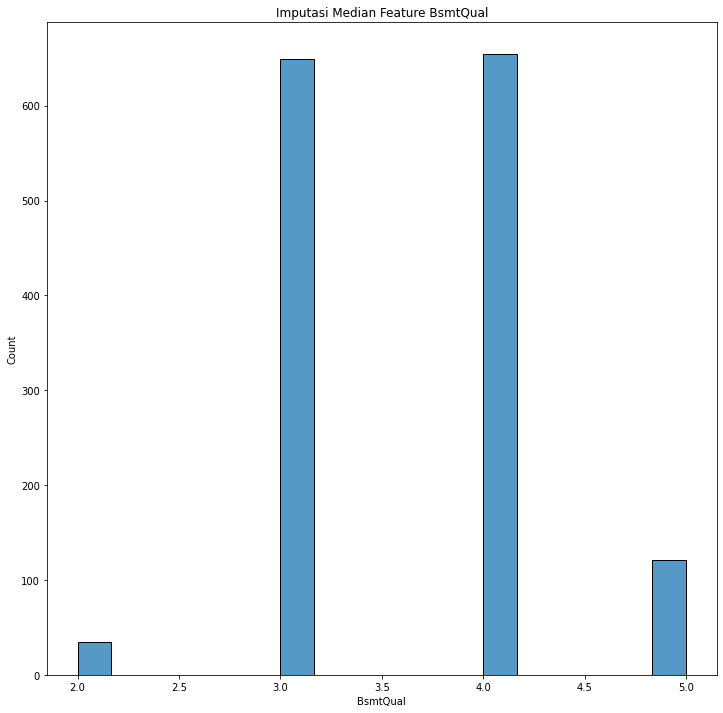

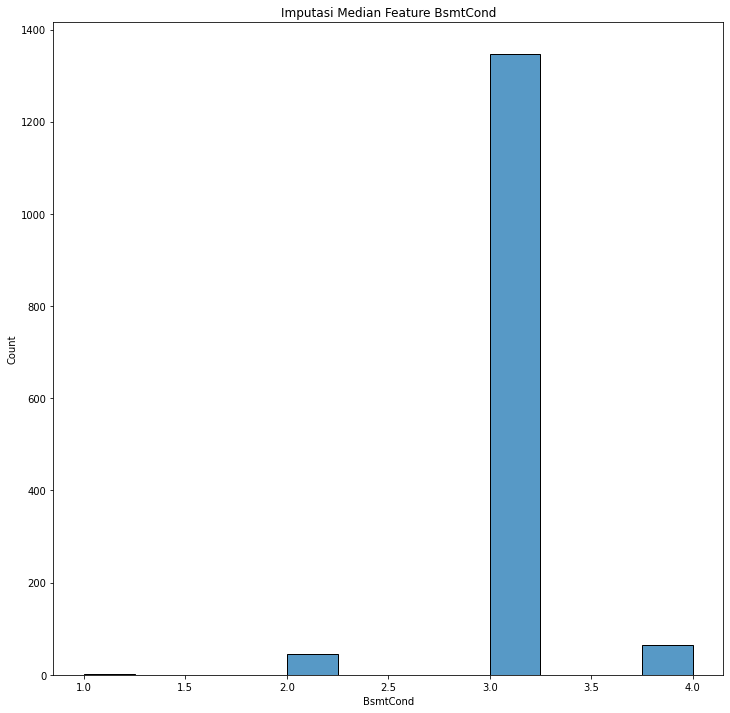

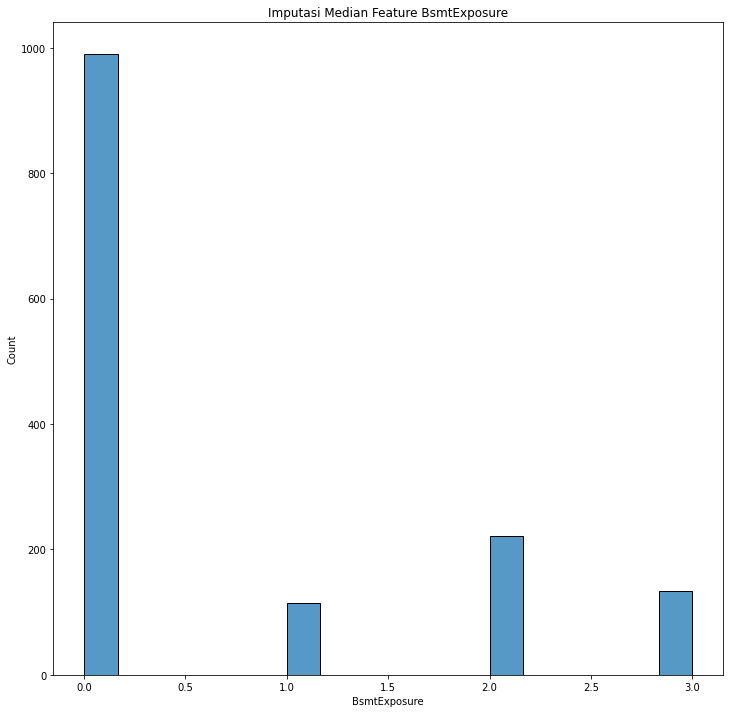

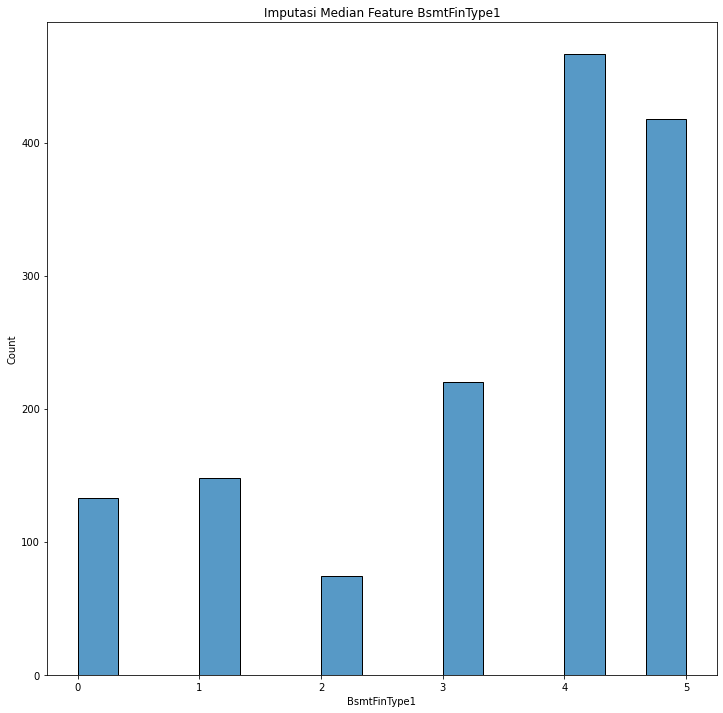

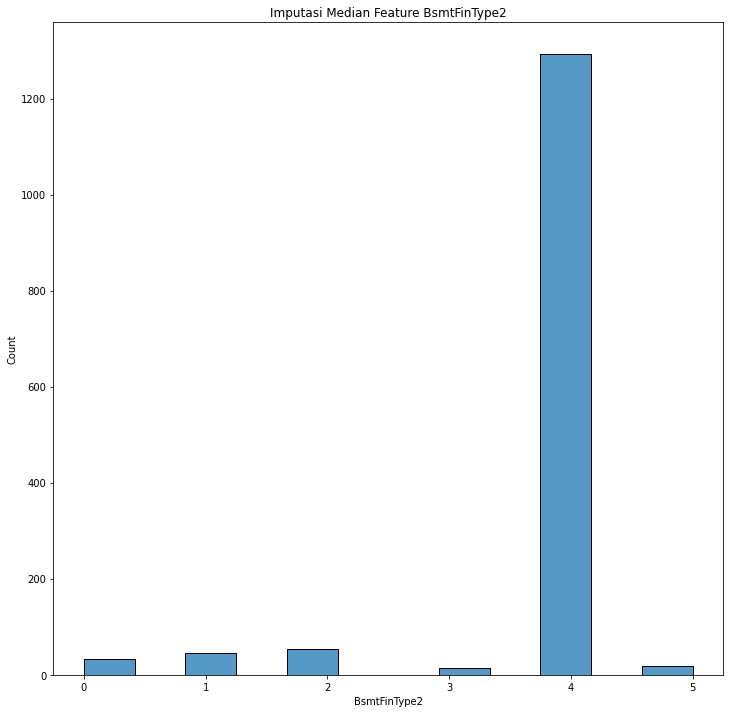

In [146]:
for x in var_na:
    plt.figure(figsize=(12,12))
    sns.histplot(df[x].fillna(df[x].median()))
    plt.title(f"Imputasi Median Feature {x}")

In [148]:
var_na

['LotFrontage',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2']

In [149]:
for x in var_na:
    df[x] = df[x].fillna(df[x].median())

In [150]:
missing(df)

,missing,percent_missing,types,n_unique
MSSubClass,0,0.0,int64,13
HalfBath,0,0.0,int64,3
FireplaceQu,0,0.0,int64,6
Fireplaces,0,0.0,int64,4
Functional,0,0.0,int64,5
TotRmsAbvGrd,0,0.0,int64,12
KitchenQual,0,0.0,int64,4
KitchenAbvGr,0,0.0,int64,4
BedroomAbvGr,0,0.0,int64,8
FullBath,0,0.0,int64,4


# Feature Scalling

In [151]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=42)

In [156]:
scaler = StandardScaler()

In [157]:
scaler.fit(X_train)

StandardScaler()

In [158]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,9,3,80.0,10400,1,0,1,1,0,0,11,4,1,4,4,7,6,1970,1970,2,0,7,6,2.0,288.0,2,3.0,4,3.0,3.0,0.0,4.0,0,4.0,0,1304,1304,2,4,1,3.0,1682,0,0,1682,0,0,2,0,3,1,2,7,4,1,5,3.0,1970.0,0.0,2,530,4,3,2,98,0,0,0,0,0,0,5,2008,2,3
1452,1,1,35.0,3675,1,0,1,1,0,0,4,4,1,3,3,5,5,2005,2005,0,0,9,9,2.0,80.0,2,3.0,4,4.0,3.0,3.0,5.0,547,4.0,0,0,547,2,4,1,3.0,1072,0,0,1072,1,0,1,0,2,1,2,5,4,0,1,2.0,2005.0,2.0,2,525,4,3,2,0,28,0,0,0,0,0,5,2006,2,3
762,12,4,72.0,8640,1,0,1,1,0,0,18,4,1,4,5,7,5,2009,2009,0,0,9,9,1.0,0.0,2,3.0,4,4.0,3.0,1.0,5.0,24,4.0,0,732,756,2,5,1,3.0,764,783,0,1547,0,0,2,1,3,1,3,7,4,0,1,3.0,2009.0,0.0,2,614,4,3,2,169,45,0,0,0,0,0,6,2010,1,3
932,9,3,84.0,11670,1,1,1,1,2,0,18,2,1,4,4,9,5,2006,2006,2,0,9,7,3.0,302.0,4,3.0,4,5.0,4.0,0.0,4.0,0,4.0,0,1905,1905,2,5,1,3.0,1905,0,0,1905,0,0,2,0,3,1,4,8,4,1,5,3.0,2006.0,2.0,3,788,4,3,2,0,191,0,0,0,0,0,3,2007,2,3
435,12,3,43.0,10667,1,3,1,1,4,0,15,5,1,4,5,7,6,1996,1996,0,0,9,9,1.0,0.0,3,3.0,4,4.0,3.0,2.0,5.0,385,5.0,344,70,799,2,5,1,3.0,827,834,0,1661,1,0,2,1,3,1,3,6,4,1,4,3.0,1996.0,1.0,2,550,4,3,2,158,61,0,0,0,0,0,4,2009,1,3


In [159]:
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])

In [160]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,0.284971,0.364318,0.429022,-0.030504,0.062684,-0.664669,-0.101992,0.031296,-0.595468,-0.231199,0.033645,0.342202,0.094258,0.380724,0.139312,0.636031,0.392266,-0.032378,-0.711644,1.940554,-0.137634,0.338658,0.112658,0.761652,1.061372,-0.685209,-0.291158,1.052064,-0.868460,-0.03375,-0.629759,0.384842,-0.970484,0.273797,-0.280335,1.643785,0.546130,0.149261,-0.150315,0.28142,0.279152,1.315652,-0.802294,-0.120313,0.287835,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,-0.763248,0.279234,0.262887,0.594240,1.208878,0.605204,0.216266,-0.954829,0.296063,0.253813,0.306491,0.293782,0.293264,0.003427,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,-0.025911,0.185245
1452,-2.099803,-2.185905,-1.524903,-0.624365,0.062684,-0.664669,-0.101992,0.031296,-0.595468,-0.231199,-1.157927,0.342202,0.094258,-0.756994,-0.630291,-0.823057,-0.508624,1.106434,0.976164,-0.535409,-0.137634,0.948541,1.041182,0.761652,-0.144680,-0.685209,-0.291158,1.052064,0.598591,-0.03375,2.243517,1.010134,0.219303,0.273797,-0.280335,-1.281383,-1.146608,0.149261,-0.150315,0.28142,0.279152,-0.251022,-0.802294,-0.120313,-0.861565,1.112115,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,-0.763248,-0.948194,0.262887,-0.943262,-1.000283,-0.284751,0.295218,1.497019,0.296063,0.229814,0.306491,0.293782,0.293264,-0.741099,-0.311187,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,-1.368961,-0.025911,0.185245
762,1.179262,1.639429,0.081658,-0.185924,0.062684,-0.664669,-0.101992,0.031296,-0.595468,-0.231199,1.225217,0.342202,0.094258,0.380724,0.908914,0.636031,-0.508624,1.236584,1.169056,-0.535409,-0.137634,0.948541,1.041182,-0.726701,-0.608547,-0.685209,-0.291158,1.052064,0.598591,-0.03375,0.328000,1.010134,-0.918281,0.273797,-0.280335,0.360659,-0.679260,0.149261,0.887671,0.28142,0.279152,-1.042064,0.973582,-0.120313,0.033459,-0.814295,-0.247663,0.767840,1.265515,0.135175,-0.212318,0.751392,0.279234,0.262887,-0.943262,-1.000283,0.605204,0.304241,-0.954829,0.296063,0.656997,0.306491,0.293782,0.293264,0.542828,-0.065423,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.137417,1.649546,-2.232704,0.185245
932,0.284971,0.364318,0.602705,0.081645,0.062684,0.825006,-0.101992,0.031296,1.044878,-0.231199,1.225217,-1.606157,0.094258,0.380724,0.139312,2.095118,-0.508624,1.138972,1.024387,1.940554,-0.137634,0.948541,0.422166,2.250005,1.142549,2.816208,-0.291158,1.052064,2.065643,3.41549,-0.629759,0.384842,-0.970484,0.273797,-0.280335,2.991965,1.890034,0.149261,0.887671,0.28142,0.279152,1.888387,-0.802294,-0.120313,0.708025,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,2.266031,0.892948,0.262887,0.594240,1.208878,0.605204,0.297474,1.497019,1.665189,1.492165,0.306491,0.293782,0.293264,-0.741099,2.045255,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,-0.614334,-0.025911,0.185245
435,1.179262,0.364318,-1.177539,-0.006927,0.062684,3.804358,-0.101992,0.031296,2.685224,-0.231199,0.714543,1.316382,0.094258,0.380724,0.908914,0.636031,0.392266,0.813597,0.542156,-0.535409,-0.137634,0.948541,1.041182,-0.726701,-0.608547,1.065500,-0.291158,1.052064,0.598591,-0.03375,1.285758,1.010134,-0.133065,1.506485,1.995752,-1.124357,-0.58

In [161]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,0.284971,0.364318,-0.005183,-0.205881,0.062684,-0.664669,-0.101992,0.031296,-0.595468,-0.231199,-0.817478,0.342202,0.094258,0.380724,0.139312,-0.093513,2.194045,-0.260141,0.879717,1.940554,-0.137634,0.033717,-0.196849,-0.726701,-0.608547,-0.685209,-0.291158,-0.650564,-0.868460,-0.03375,-0.629759,1.010134,0.471617,0.273797,-0.280335,-0.393065,-0.001718,0.149261,-1.188301,0.28142,0.279152,-0.261295,-0.802294,-0.120313,-0.869102,-0.814295,3.901704,-1.069941,-0.758517,0.135175,-0.212318,-0.763248,-0.334480,0.262887,-0.943262,-1.000283,0.605204,0.200475,0.271095,-1.073062,-1.022939,0.306491,0.293782,0.293264,0.717564,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.647524,-1.368961,-0.025911,0.185245
1105,1.179262,0.364318,1.210593,0.133392,0.062684,0.825006,-0.101992,0.031296,1.044878,-0.231199,1.906116,0.342202,0.094258,0.380724,0.908914,1.365574,-0.508624,0.748522,0.493933,-0.535409,-0.137634,0.033717,-0.196849,0.761652,1.490449,1.065500,-0.291158,1.052064,2.065643,-0.03375,1.285758,1.010134,1.274234,0.273797,-0.280335,-0.314552,0.901672,0.149261,0.887671,0.28142,0.279152,0.848218,1.742448,-0.120313,2.059040,1.112115,-0.247663,0.767840,1.265515,0.135175,-0.212318,0.751392,1.506662,0.262887,2.131743,0.656587,0.605204,0.270404,0.271095,0.296063,1.127379,0.306491,0.293782,0.293264,0.671981,-0.253360,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,1.649546,-0.025911,0.185245
413,-2.397900,-2.185905,-0.613071,-0.157666,0.062684,-0.664669,-0.101992,0.031296,-0.595468,-0.231199,-0.987702,-3.554517,0.094258,0.380724,0.139312,-0.823057,0.392266,-1.431491,-1.676106,-0.535409,-0.137634,-0.881108,-0.506357,-0.726701,-0.608547,-0.685209,-0.291158,-0.650564,-0.868460,-0.03375,-0.629759,0.384842,-0.970484,0.273797,-0.280335,0.979790,-0.115759,0.149261,-0.150315,0.28142,-2.201657,-0.364028,-0.802294,-0.120313,-0.944472,-0.814295,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,-0.763248,-0.948194,0.262887,0.594240,1.208878,-1.174705,0.119267,-0.954829,0.296063,-0.562156,0.306491,0.293782,0.293264,-0.741099,-0.715974,1.767303,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,1.649546,-0.025911,0.185245
522,-0.907416,-2.185905,-0.873595,-0.507359,0.062684,-0.664669,-0.101992,0.031296,1.044878,-0.231199,-1.328151,-2.580337,0.094258,0.380724,-2.169496,-0.093513,1.293156,-0.780741,-1.676106,-0.535409,-0.137634,1.253483,1.350690,-0.726701,-0.608547,-0.685209,2.841087,-0.650564,-0.868460,-0.03375,-0.629759,-0.240450,-0.102613,0.273797,-0.280335,0.075769,-0.124704,0.149261,0.887671,0.28142,0.279152,-0.425667,0.694613,-0.120313,0.253918,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,-0.763248,0.279234,0.262887,2.131743,1.208878,-1.174705,0.171150,-0.954829,0.296063,-0.274167,0.306491,0.293782,0.293264,-0.741099,-0.369014,0.238954,-0.119317,-0.275896,-0.069193,-0.122987,1.372691,-1.368961,-0.025911,0.185245
1036,0.284971,0.364318,0.819808,0.190085,0.062684,0.825006,4.635993,0.031296,-0.595468,-0.231199,1.395442,0.342202,0.094258,0.380724,0.139312,2.095118,-0.508624,1.171509,1.120833,1.940554,-0.137634,0.948541,1.041182,2.250005,-0.202664,1.065500,-0.291158,1.052064,2.065643,-0.03375,2.243517,1.010134,1.252482,0.27379

# Feature Selection

In [163]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [162]:
#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [164]:
#remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=42))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [165]:
sel_.get_support().sum()

67

In [166]:
selected_feats = X_train.columns[(sel_.get_support())]
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold',

In [172]:
abs(df.corr()["SalePrice"])

MSSubClass       0.480584
MSZoning         0.324610
LotFrontage      0.334771
LotArea          0.263843
Street           0.041036
LotShape         0.265699
LandContour      0.158437
Utilities        0.014314
LotConfig        0.122882
LandSlope        0.051152
Neighborhood     0.695265
Condition1       0.159087
Condition2       0.030676
BldgType         0.176025
HouseStyle       0.260616
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
RoofStyle        0.234134
RoofMatl         0.104505
Exterior1st      0.357866
Exterior2nd      0.365201
MasVnrType       0.423697
MasVnrArea       0.472614
ExterQual        0.682639
ExterCond        0.045068
Foundation       0.500710
BsmtQual         0.617356
BsmtCond         0.159445
BsmtExposure     0.361863
BsmtFinType1     0.338613
BsmtFinSF1       0.386420
BsmtFinType2     0.084625
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
Heating          0.111597
HeatingQC   

In [170]:
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 75
selected features: 67
features with coefficients shrank to zero: 8
